In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_app_train = pd.read_csv('../data/application_train.csv')
df_app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df_app_train.shape

(307511, 122)

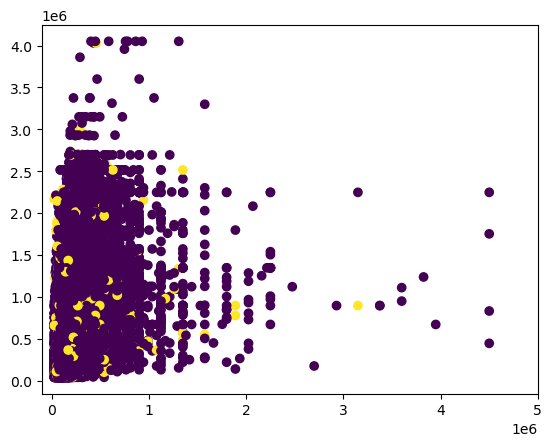

In [4]:
plt.scatter(x=df_app_train['AMT_INCOME_TOTAL'], y=df_app_train['AMT_CREDIT'], c=df_app_train['TARGET'])
plt.xlim(-100000, 5000000)
plt.show()

In [5]:
df_target_0 = df_app_train[df_app_train["TARGET"] == 0]

In [6]:
pd.crosstab(df_app_train["TARGET"], df_app_train["CODE_GENDER"], margins=True, normalize="columns")

CODE_GENDER,F,M,XNA,All
TARGET,,,,
0,0.930007,0.898581,1.0,0.919271
1,0.069993,0.101419,0.0,0.080729


In [7]:
pd.crosstab(df_app_train["TARGET"], df_app_train["FLAG_OWN_CAR"], margins=True, normalize="columns")

FLAG_OWN_CAR,N,Y,All
TARGET,,,
0,0.914998,0.927563,0.919271
1,0.085002,0.072437,0.080729


In [8]:
pd.crosstab(df_app_train["TARGET"], df_app_train["FLAG_OWN_REALTY"], margins=True, normalize="columns")

FLAG_OWN_REALTY,N,Y,All
TARGET,,,
0,0.916751,0.920384,0.919271
1,0.083249,0.079616,0.080729


In [9]:
conditions = [
    (df_app_train["FLAG_OWN_REALTY"] == 'Y') & (df_app_train["FLAG_OWN_CAR"] == 'Y'),
    (df_app_train["FLAG_OWN_REALTY"] == 'Y'),
    (df_app_train["FLAG_OWN_CAR"] == 'Y')
]
choices = [
    "BOTH",
    "REALTY",
    "CAR"
]

realty_and_car = np.select(conditions, choices, default="NEITHER")
pd.crosstab(df_app_train["TARGET"], realty_and_car, margins=True, normalize='columns')

col_0,BOTH,CAR,NEITHER,REALTY,All
TARGET,,,,,
0,0.926672,0.929562,0.910088,0.917156,0.919271
1,0.073328,0.070438,0.089912,0.082844,0.080729


In [10]:
pd.crosstab(df_app_train["TARGET"], df_app_train["CNT_CHILDREN"], margins=True, normalize="columns")

CNT_CHILDREN,0,1,2,3,4,5,6,7,8,9,10,11,12,14,19,All
TARGET,,,,,,,,,,,,,,,,
0,0.922882,0.910764,0.912782,0.903686,0.871795,0.916667,0.714286,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.919271
1,0.077118,0.089236,0.087218,0.096314,0.128205,0.083333,0.285714,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.080729


<Axes: xlabel='YEARS_BIRTH'>

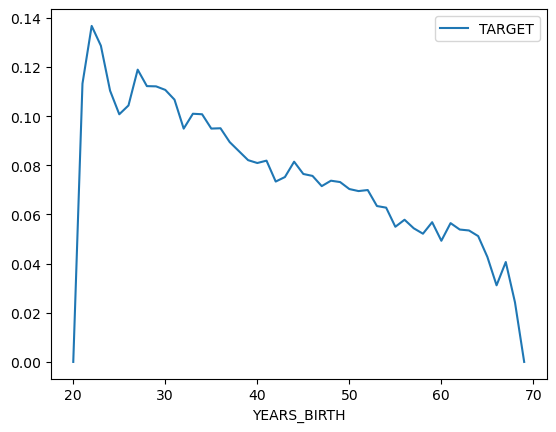

In [11]:
df_app_train["YEARS_BIRTH"] = np.floor(abs(df_app_train["DAYS_BIRTH"])/365)
age = df_app_train.groupby('YEARS_BIRTH')['TARGET'].agg('mean').reset_index()
age.plot(x="YEARS_BIRTH", y="TARGET")

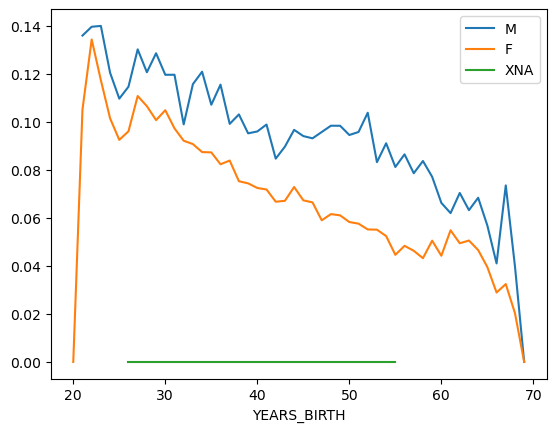

In [12]:
age_ge = df_app_train.groupby(['YEARS_BIRTH', "CODE_GENDER"])['TARGET'].agg('mean').reset_index()
ax = age_ge[age_ge["CODE_GENDER"] == "M"].plot(x="YEARS_BIRTH", y="TARGET", label="M")
age_ge[age_ge["CODE_GENDER"] == "F"].plot(x="YEARS_BIRTH", y="TARGET", label="F", ax=ax)
age_ge[age_ge["CODE_GENDER"] == "XNA"].plot(x="YEARS_BIRTH", y="TARGET", label="XNA", ax=ax)
plt.show()

(array([1.000e+00, 1.254e+03, 2.933e+03, 4.057e+03, 3.905e+03, 4.168e+03,
        4.561e+03, 8.476e+03, 7.975e+03, 7.670e+03, 7.806e+03, 8.377e+03,
        7.911e+03, 7.714e+03, 7.631e+03, 7.804e+03, 8.614e+03, 8.799e+03,
        8.873e+03, 8.770e+03, 8.624e+03, 8.449e+03, 8.216e+03, 8.308e+03,
        7.819e+03, 7.205e+03, 7.293e+03, 7.018e+03, 6.984e+03, 6.627e+03,
        6.482e+03, 6.689e+03, 6.763e+03, 7.457e+03, 7.551e+03, 6.637e+03,
        6.828e+03, 6.768e+03, 6.268e+03, 6.631e+03, 6.227e+03, 5.418e+03,
        5.514e+03, 5.197e+03, 5.117e+03, 3.113e+03, 2.085e+03, 2.042e+03,
        8.660e+02, 1.600e+01]),
 array([20.  , 20.98, 21.96, 22.94, 23.92, 24.9 , 25.88, 26.86, 27.84,
        28.82, 29.8 , 30.78, 31.76, 32.74, 33.72, 34.7 , 35.68, 36.66,
        37.64, 38.62, 39.6 , 40.58, 41.56, 42.54, 43.52, 44.5 , 45.48,
        46.46, 47.44, 48.42, 49.4 , 50.38, 51.36, 52.34, 53.32, 54.3 ,
        55.28, 56.26, 57.24, 58.22, 59.2 , 60.18, 61.16, 62.14, 63.12,
        64.1 , 65.08,

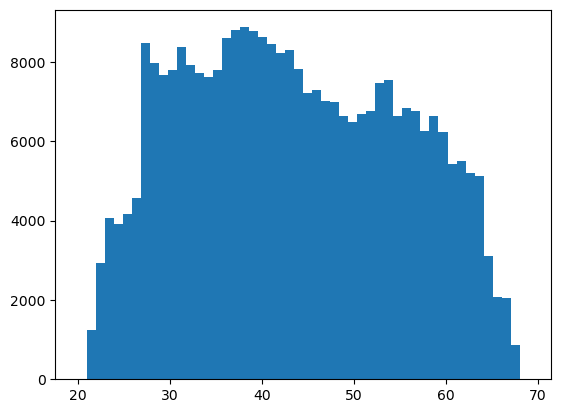

In [13]:
plt.hist(df_app_train["YEARS_BIRTH"], bins=50)

In [14]:
pd.crosstab(df_app_train["CODE_GENDER"], df_app_train["FLAG_OWN_CAR"], normalize="index")

FLAG_OWN_CAR,N,Y
CODE_GENDER,,
F,0.777923,0.222077
M,0.432452,0.567548
XNA,0.500000,0.500000


In [15]:
pd.crosstab(df_app_train["CODE_GENDER"], df_app_train["FLAG_OWN_REALTY"], normalize="index")

FLAG_OWN_REALTY,N,Y
CODE_GENDER,,
F,0.291596,0.708404
M,0.334726,0.665274
XNA,0.000000,1.000000


In [16]:
pd.crosstab(df_app_train["CODE_GENDER"], realty_and_car, normalize="index")

col_0,BOTH,CAR,NEITHER,REALTY
CODE_GENDER,,,,
F,0.159592,0.062485,0.229111,0.548813
M,0.381205,0.186343,0.148383,0.284069
XNA,0.500000,0.000000,0.000000,0.500000


In [17]:
bins = list(range(20, 75, 5))
labels=["20-25", "26-30", "31-35", "36-40", "41-45", "46-50", "51-55", "56-60", "61-65", "66+"]
df_app_train["AGE_BRACKET"] = pd.cut(df_app_train["YEARS_BIRTH"], bins, labels=labels, right=True)
ct_age_items = pd.crosstab(df_app_train["AGE_BRACKET"], realty_and_car, normalize="index")
ct_age_items

col_0,BOTH,CAR,NEITHER,REALTY
AGE_BRACKET,,,,
20-25,0.214684,0.113746,0.264448,0.407121
26-30,0.242244,0.148679,0.245889,0.363188
31-35,0.264143,0.146385,0.220073,0.369399
36-40,0.276282,0.126854,0.203526,0.393338
41-45,0.270695,0.115909,0.185614,0.427782
46-50,0.264184,0.086618,0.167074,0.482124
51-55,0.219990,0.080748,0.182523,0.516739
56-60,0.180062,0.059440,0.182232,0.578265
61-65,0.142781,0.043475,0.188062,0.625682


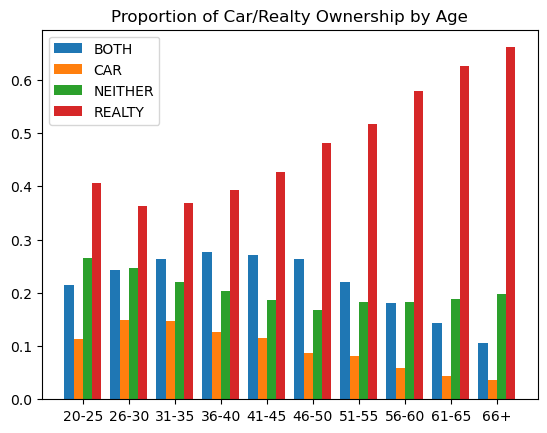

In [18]:
x = np.arange(10)
width = 0.2
plt.bar(x-0.3, ct_age_items["BOTH"], width)
plt.bar(x-0.1, ct_age_items["CAR"], width)
plt.bar(x+0.1, ct_age_items["NEITHER"], width)
plt.bar(x+0.3, ct_age_items["REALTY"], width)
plt.xticks(x, labels)
plt.legend(ct_age_items.columns)
plt.title("Proportion of Car/Realty Ownership by Age")
plt.show()

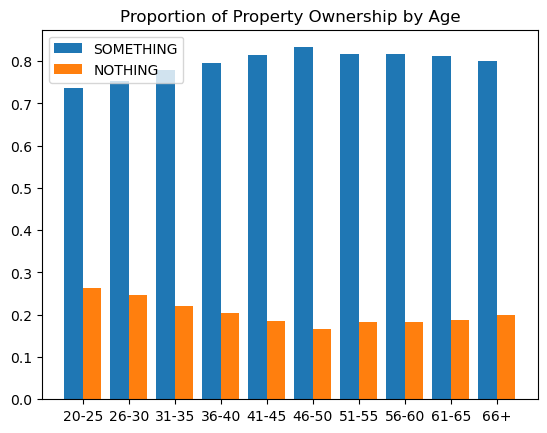

In [23]:
x = np.arange(10)
width = 0.4
plt.bar(x-0.2, ct_age_items["BOTH"]+ct_age_items["CAR"]+ct_age_items["REALTY"], width)
plt.bar(x+0.2, ct_age_items["NEITHER"], width)
plt.xticks(x, labels)
plt.legend(["SOMETHING", "NOTHING"])
plt.title("Proportion of Property Ownership by Age")
plt.show()

In [20]:
ct_cols = ["REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION",
           "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY"]
for column_name in ct_cols:
    print(pd.crosstab(df_app_train["TARGET"], df_app_train[column_name], margins=True, normalize="columns"))

REG_REGION_NOT_LIVE_REGION        0         1       All
TARGET                                                 
0                           0.91946  0.907022  0.919271
1                           0.08054  0.092978  0.080729
REG_REGION_NOT_WORK_REGION         0         1       All
TARGET                                                  
0                           0.919709  0.911094  0.919271
1                           0.080291  0.088906  0.080729
LIVE_REGION_NOT_WORK_REGION         0        1       All
TARGET                                                  
0                            0.919429  0.91554  0.919271
1                            0.080571  0.08446  0.080729
REG_CITY_NOT_LIVE_CITY         0        1       All
TARGET                                             
0                       0.922793  0.87774  0.919271
1                       0.077207  0.12226  0.080729
REG_CITY_NOT_WORK_CITY         0         1       All
TARGET                                              
0     

The flags for living in a different city than you work/can be contacted seem to have a correlation. We can use `REG_CITY_NOT_LIVE_CITY`, `REG_CITY_NOT_WORK_CITY`, and `LIVE_CITY_NOT_WORK_CITY` in our model.

In [21]:
for column_name in ct_cols[3:]:
    print(pd.crosstab(df_app_train["CODE_GENDER"], df_app_train[column_name], normalize="index", margins=True))
    print(pd.crosstab(df_app_train["AGE_BRACKET"], df_app_train[column_name], normalize="index", margins=True))

REG_CITY_NOT_LIVE_CITY         0         1
CODE_GENDER                               
F                       0.931158  0.068842
M                       0.903845  0.096155
XNA                     1.000000  0.000000
All                     0.921827  0.078173
REG_CITY_NOT_LIVE_CITY         0         1
AGE_BRACKET                               
20-25                   0.789177  0.210823
26-30                   0.845127  0.154873
31-35                   0.887187  0.112813
36-40                   0.921016  0.078984
41-45                   0.939170  0.060830
46-50                   0.952418  0.047582
51-55                   0.958942  0.041058
56-60                   0.971823  0.028177
61-65                   0.977955  0.022045
66+                     0.984228  0.015772
All                     0.921827  0.078173
REG_CITY_NOT_WORK_CITY         0         1
CODE_GENDER                               
F                       0.811280  0.188720
M                       0.689118  0.310882
XNA        